# **Importing all libraries**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer, RobustScaler, QuantileTransformer,StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import train_test_split, KFold, cross_val_predict,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline

# **Load the Dataset**

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        house_data=os.path.join(dirname, filename)
#         print(os.path.join(dirname, filename))
housing = pd.read_csv(house_data)
housing.head(10)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [3]:
#check and remove duplicate value
print('Shape before deleting duplicate values:', housing.shape)

# Removing duplicate rows if any
housing=housing.drop_duplicates()
print('Shape After deleting duplicate values:', housing.shape)

Shape before deleting duplicate values: (506, 14)
Shape After deleting duplicate values: (506, 14)


# **Defining the problem statement:**
**Create a ML model which can predict the price( MEDV ) of a house**

*Target Variable: MEDV

*Predictors: CRIM, ZN, INDUS, CHAS, NOX, RM, etc.
# **Determining the type of Machine Learning**
Based on the problem statement you can understand that we need to create a **supervised ML Regression model**, as the target variable is Continuous.

# **Looking at the distribution of Target variable**
*If target variable's distribution is too skewed then the predictive modeling will not be possible.

*Bell curve is desirable but slightly positive skew or negative skew is also fine

*When performing Regression, make sure the histogram looks like a bell curve or slight skewed version of it. Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios.

# **Basic Data Exploration**

**There are four commands which are used for Basic data exploration in Python**

head() : This helps to see a few sample rows of the data

info() : This provides the summarized information of the data

describe() : This provides the descriptive statistical details of the data

nunique(): This helps us to identify if a column is categorical or continuous

In [4]:
# datatype info

housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 59.3 KB


In [5]:
# check for null values
housing.isna().sum().to_frame()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [6]:
# statistical info

housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
housing.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

# **Basic Data Exploration Results**
Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regaring each column. Hence, creating a initial roadmap for further analysis.

The selected columns in this step are not final, further study will be done and then a final list will be created

**CRIM** - Continuous. Selected.

**ZN** - Continuous. Selected.

**INDUS** - Continuous. Selected.

**CHAS** - Categorical. Selected.

**NOX** - Continuous. Selected.

**RM** - Continuous. Selected.

**AGE** - Continuous. Selected.

**DIS** - Continuous. Selected.

**RAD** - Categorical. Selected.

**TAX** - Continuous. Selected.

**PTRATIO** - Continuous. Selected.

**B** - Continuous. Selected.

**LSTAT** - Continuous. Selected.

**MEDV** - Continuous. Selected. This is the Target Variable!

In [8]:
def overview_dataset(df):
    # Observetions
    print("Number of observetion:", df.shape[0])
    # Features
    print("Number of features:", df.shape[1])
    print("-"*60)
    #Categorical Features
    print("Categorical Features:", df.select_dtypes(include = [object]).columns)
    print("")
    # Numerical Features
    print("Numerical Features:", df.select_dtypes(include = [int,float]).columns)
    
overview_dataset(housing)

Number of observetion: 506
Number of features: 14
------------------------------------------------------------
Categorical Features: Index([], dtype='object')

Numerical Features: Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


# **Multivariate Analysis**

In [9]:
Corr_matrix=housing.corr()
Corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

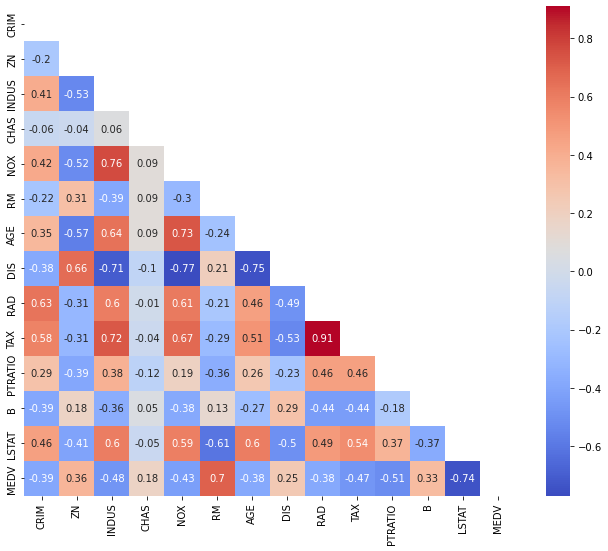

In [10]:
plt.figure(figsize=(11,9))
corr = housing.corr().round(2)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# # Want diagonal elements as well
# mask[np.diag_indices_from(mask)] = False

sns.heatmap(data=corr, annot=True,cmap='coolwarm',mask=mask)
plt.xticks(rotation=90)
plt.show()

# **Univariate Analysis**

# Checking for outliers

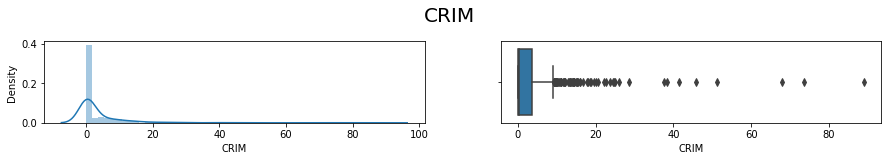

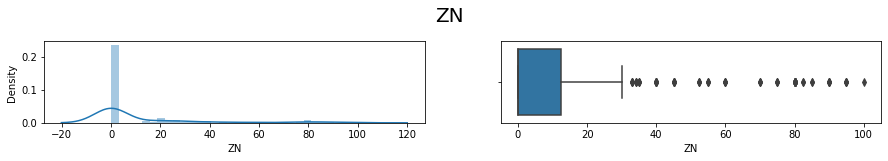

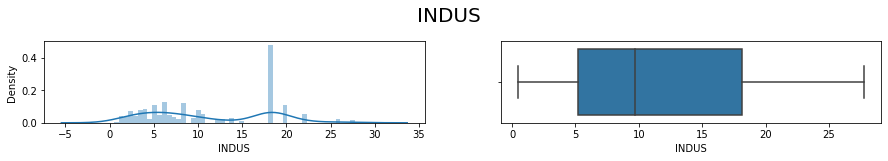

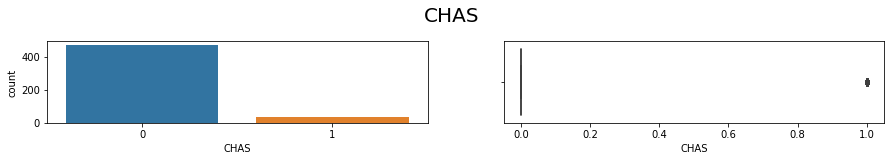

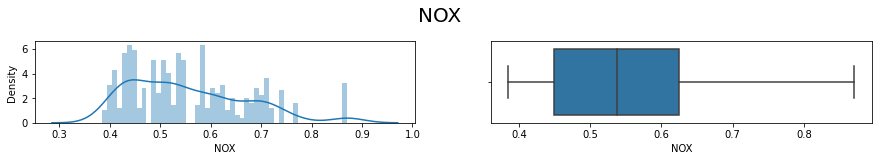

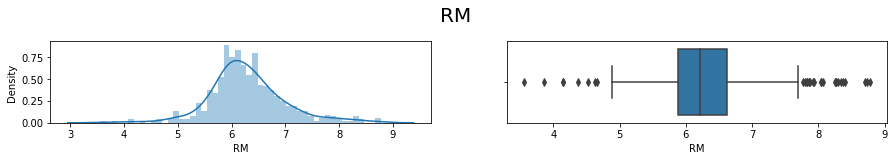

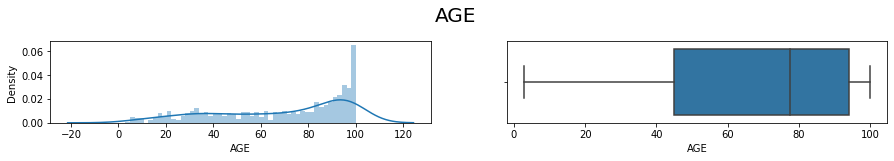

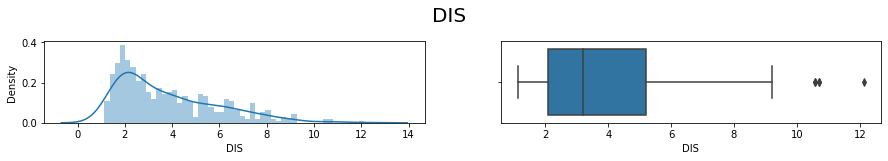

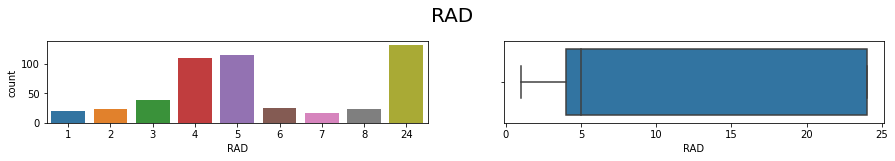

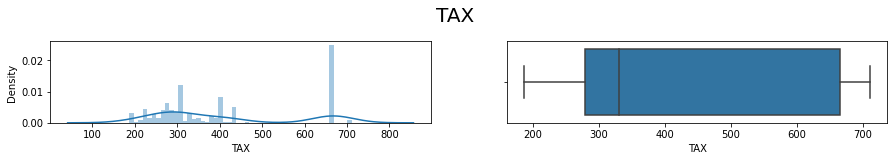

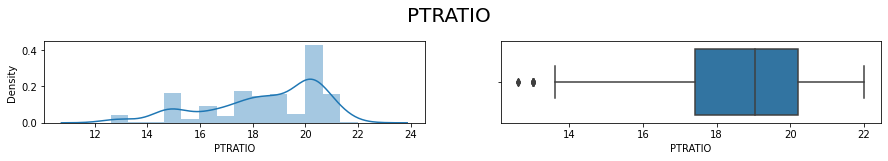

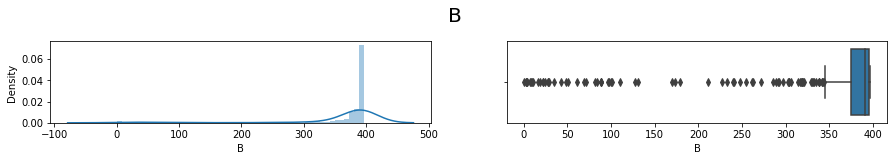

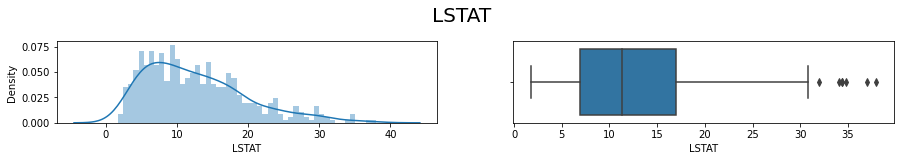

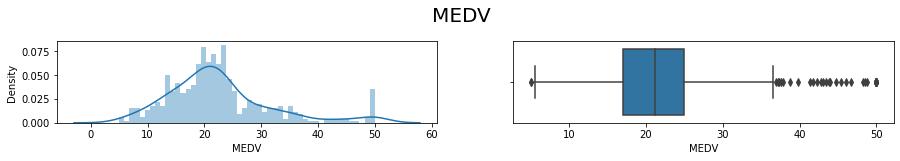

In [11]:
for col in housing.columns:
    fig,ax = plt.subplots(1,2,figsize=(15,1.5))
    if len(np.unique(housing[col]))<10:
        sns.countplot(housing[col],ax=ax[0])
    else:
        sns.distplot(housing[col],bins=50 if len(np.unique(housing[col]))>50 else None,ax=ax[0])
        
    sns.boxplot(housing[col],ax=ax[1])
    plt.suptitle(col,fontsize=20,y=1.2)
    plt.show()

In [12]:
print(housing['CHAS'].value_counts())

0    471
1     35
Name: CHAS, dtype: int64


# **Train Test Splitting**

In [13]:
split=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    train_dataset=housing.loc[train_index]
    test_dataset=housing.loc[test_index]

In [14]:
print("Train Data Shape:",train_dataset.shape)
print("Test Data Shape:", test_dataset.shape)
print("\ncolumn CHAS values count in train dataset:\n",train_dataset['CHAS'].value_counts())
print("\ncolumn CHAS values count in test dataset:\n",test_dataset['CHAS'].value_counts())

Train Data Shape: (404, 14)
Test Data Shape: (102, 14)

column CHAS values count in train dataset:
 0    376
1     28
Name: CHAS, dtype: int64

column CHAS values count in test dataset:
 0    95
1     7
Name: CHAS, dtype: int64


In [15]:
X_train=train_dataset.drop("MEDV",axis=1)
Y_train=train_dataset["MEDV"]


# Calculating Outliers

In [16]:
for k, v in X_train.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(X_train)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.61%
Column ZN outliers = 10.40%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 6.44%
Column AGE outliers = 0.00%
Column DIS outliers = 0.50%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 0.00%
Column B outliers = 13.37%
Column LSTAT outliers = 1.49%


# **Choosing the relevant transformer for the dataset**

# StandardScaler

In [17]:
scaler = StandardScaler()
stds_new = scaler.fit_transform(X_train)
stds_data = pd.DataFrame(data=stds_new, columns=X_train.columns)

# Robust Scaler

In [18]:
rs = RobustScaler()
rs_new = rs.fit_transform(X_train)
rs_data = pd.DataFrame(data=rs_new, columns=X_train.columns)

# Quantile Transformer

In [19]:
qt = QuantileTransformer()
qt_new = qt.fit_transform(X_train)
qt_data = pd.DataFrame(data=qt_new, columns=X_train.columns)

# Yeo-Johnson Transformer

In [20]:
yeojohnTr = PowerTransformer(standardize=True)
yeo_new = yeojohnTr.fit_transform(X_train)
yeo_data = pd.DataFrame(data=yeo_new , columns=X_train.columns)

# Choosing the most efficient transformer

In [21]:
print("Means\n""Standard Scaler :",stds_data.skew().mean(),"\nRobust Scaler :",rs_data.skew().mean(),"\nQuantile Transformer :",qt_data.skew().mean(),"\nYeo-Johnson Transformer",yeo_data.skew().mean(),"\n")
skews = {'Standard Scaler': stds_data.skew(),'Robust Scaler': rs_data.skew(), 'Quantile Transformer': qt_data.skew(), 'Yeo-Johnson Transformer': yeo_data.skew()}
pd.DataFrame(skews)

Means
Standard Scaler : 0.8651809014264826 
Robust Scaler : 0.8651809014264826 
Quantile Transformer : 0.36588866642730317 
Yeo-Johnson Transformer 0.21902904940210316 



,Standard Scaler,Robust Scaler,Quantile Transformer,Yeo-Johnson Transformer
CRIM,5.091278,5.091278,4.510868e-07,0.630676
ZN,2.175456,2.175456,1.077614e+00,1.043943
INDUS,0.328743,0.328743,-4.484148e-02,-0.089959
CHAS,3.404266,3.404266,3.404266e+00,3.404266
NOX,0.749074,0.749074,1.024643e-02,0.107536
RM,0.313269,0.313269,1.390858e-06,0.037103
AGE,-0.497231,-0.497231,6.342839e-02,-0.366937
DIS,0.887272,0.887272,-9.859296e-05,0.059176
RAD,1.037251,1.037251,1.863574e-01,0.062887
TAX,0.700043,0.700043,-6.237771e-02,0.094274


**Result** = Yeo-Johnson Transformer is best

# Calculating Outliers After transforming

In [22]:
for k, v in yeo_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(X_train)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 0.00%
Column ZN outliers = 0.00%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.45%
Column AGE outliers = 0.00%
Column DIS outliers = 0.00%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 0.00%
Column B outliers = 12.13%
Column LSTAT outliers = 0.00%


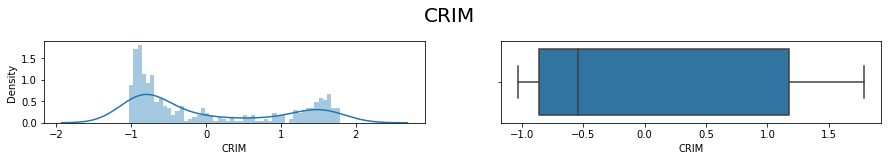

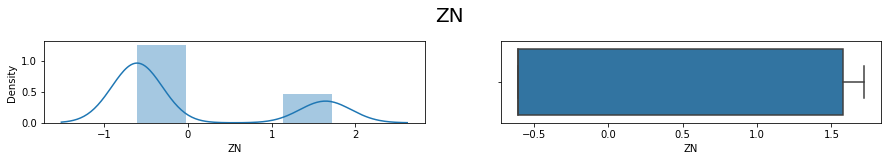

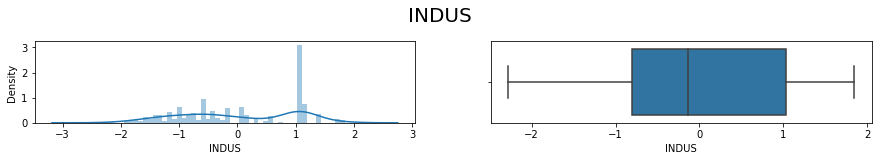

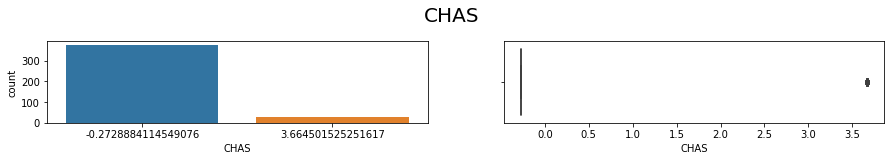

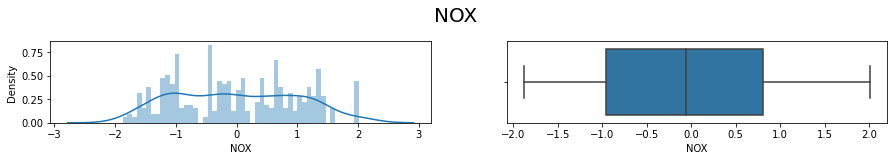

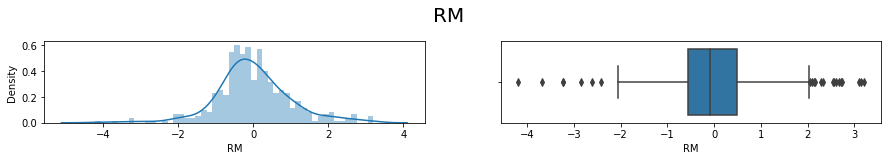

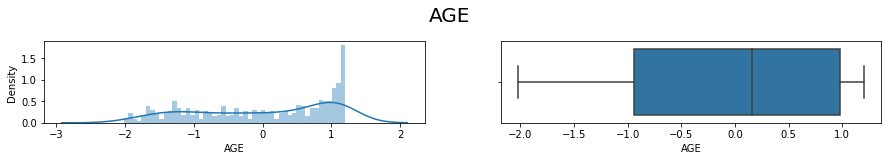

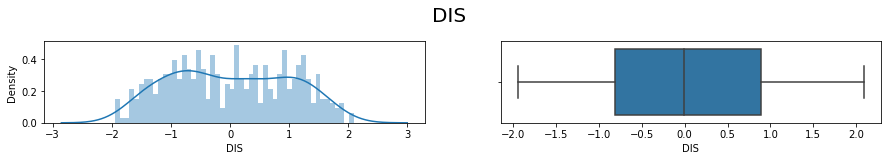

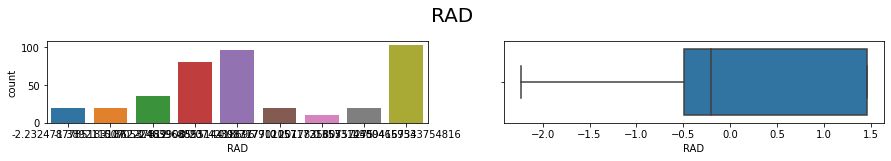

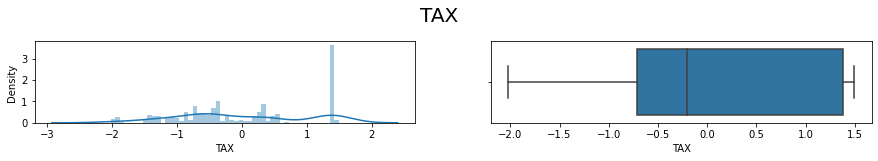

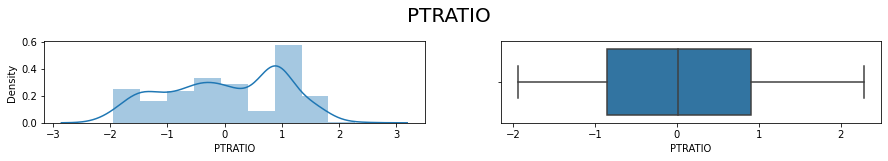

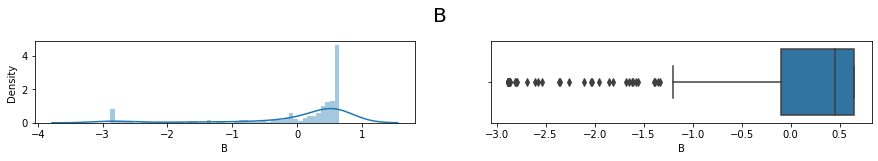

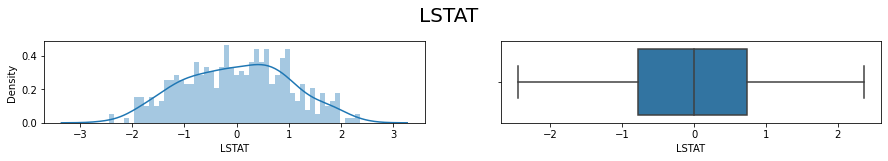

In [23]:
for col in yeo_data.columns:
    fig,ax = plt.subplots(1,2,figsize=(15,1.5))
    if len(np.unique(yeo_data[col]))<10:
        sns.countplot(yeo_data[col],ax=ax[0])
    else:
        sns.distplot(yeo_data[col],bins=50 if len(np.unique(yeo_data[col]))>50 else None,ax=ax[0])
        
    sns.boxplot(yeo_data[col],ax=ax[1])
    plt.suptitle(col,fontsize=20,y=1.2)
    plt.show()

# Create Pipeline

In [24]:
my_pipeline= Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('yeojohnTr',PowerTransformer(standardize=True)),
#     ('std_scales',StandardScaler()),
])
data =my_pipeline.fit_transform(X_train)
data = pd.DataFrame(data=data , columns=X_train.columns)
X_train=data.copy()
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.449854,-0.607604,0.064370,-0.272888,0.101129,-0.042598,0.517215,0.019555,-0.489909,-0.422527,-0.147212,0.507657,-0.499091
1,1.599773,-0.607604,1.028956,-0.272888,1.459923,-0.621733,1.063926,-1.011882,1.459417,1.379505,0.903118,-2.532146,1.449365
2,1.517824,-0.607604,1.028956,3.664502,1.605052,-0.117608,1.096258,-0.798729,1.459417,1.379505,0.903118,-0.073629,0.887257
3,-0.797184,-0.607604,-0.593456,-0.272888,-0.352121,-0.640270,-0.284766,0.085127,-0.207424,-0.675499,0.282820,-0.079477,0.116392
4,0.332808,-0.607604,-0.204996,-0.272888,0.044582,-0.348459,0.752298,0.600916,-0.489909,-0.394390,1.471999,-1.815615,0.853700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.658918,-0.607604,1.170608,3.664502,0.616959,2.706412,0.955308,-0.763496,-0.207424,0.323511,-1.513637,0.314957,-1.783796
400,-1.004932,1.708228,-1.599516,-0.272888,-1.130478,0.463113,-1.340215,1.695506,-0.489909,-0.664693,-0.774118,0.410980,-0.936486
401,-0.558035,1.595183,-1.195435,-0.272888,-1.024655,0.701607,-1.264318,0.448508,-0.207424,-1.510876,-1.461639,0.650034,-1.253652
402,-0.287844,-0.607604,0.064370,-0.272888,0.101129,0.370799,0.693140,0.206353,-0.489909,-0.422527,-0.147212,0.600432,-0.234166


# **Modeling**

In [25]:
scores_map={}
scores_map = pd.DataFrame(scores_map)
# scores_map

# Analysis on verious type of model

In [26]:
pipelines = []
pipelines.append(('LinearRegression', Pipeline([('LR',LinearRegression())])))
pipelines.append(('LASSO', Pipeline([('LASSO', Lasso())])))
pipelines.append(('ElasticNet', Pipeline([('EN', ElasticNet())])))
pipelines.append(('GradientBoostingRegressor', Pipeline([('GBM', GradientBoostingRegressor())])))
pipelines.append(('RandomForestRegressor', Pipeline([('RFR', RandomForestRegressor())])))
pipelines.append(('DecisionTreeRegressor', Pipeline([('DTR', DecisionTreeRegressor())])))
pipelines.append(('ExtraTreesRegressor', Pipeline([('ETR', ExtraTreesRegressor())])))
pipelines.append(('XGBRegressor', Pipeline([('XGBR', XGBRegressor(verbosity=0))])))
pipelines.append(('AdaBoostRegressor', Pipeline([('AdBR', AdaBoostRegressor())])))
pipelines.append(('CatBoostRegressor', Pipeline([('CBR', CatBoostRegressor(verbose=0))])))
pipelines.append(('SVR', Pipeline([('SVR', SVR())])))
pipelines.append(('KNeighborsRegressor', Pipeline([('KNR', KNeighborsRegressor())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LinearRegression: -22.434288 (8.928922)
LASSO: -29.469311 (13.252487)
ElasticNet: -31.747447 (15.622990)
GradientBoostingRegressor: -8.818334 (4.170905)
RandomForestRegressor: -10.424289 (5.692682)
DecisionTreeRegressor: -20.238946 (13.699997)
ExtraTreesRegressor: -10.237141 (5.038630)
XGBRegressor: -8.666562 (3.598404)
AdaBoostRegressor: -13.841808 (5.643176)
CatBoostRegressor: -8.539495 (3.673199)
SVR: -31.682536 (18.051932)
KNeighborsRegressor: -23.741921 (11.902842)


In [27]:
# model=DecisionTreeRegressor()
# model=RandomForestRegressor()
# model=LinearRegression()
# model=SVR()
# model=ExtraTreesRegressor()
# model=XGBRegressor(verbosity=0)
# model =KNeighborsRegressor()
# model=GradientBoostingRegressor()
# model=AdaBoostRegressor()
# model =  CatBoostRegressor(verbose=0)
# model.fit(X_train, Y_train)
# scores = cross_val_score(model, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
# rmse_scores=np.sqrt(-scores)
# scores_map['CBR'] = rmse_scores
# print('RMSE \n Mean:{:.3f}; Standard Deviation: {:.3f}'.format(rmse_scores.mean(),rmse_scores.std()))

In [28]:
X_test=test_dataset.drop("MEDV",axis=1)
Y_test=test_dataset["MEDV"].copy()
# X_test_prepared=my_pipeline.transform(X_test)
# X_test=pd.DataFrame(data=X_test_prepared , columns=X_test.columns)

In [29]:
## Now test the model on test data

# X_test_prepared=my_pipeline.transform(X_test)
# final_predictions= model.predict(X_test_prepared)
# final_predictions= model.predict(X_test)
# final_mse=mean_squared_error(Y_test,final_predictions)
# final_rmse=np.sqrt(final_mse)
# print(final_rmse)

In [30]:
# print("Mean:\n",scores_map.mean())
# print("\nStandard deviation: \n",scores_map.std())

# **After testing Top 2 selected model are**
**1. CatBoost Regressor**

**2. Gradient Boosting Regressor**

# **Create Model**

# Gradient Boosting

In [31]:
# gbr = GradientBoostingRegressor(random_state=0)
# param_grid={'n_estimators':[50,100,150, 200], 'learning_rate': [0.5,0.1,0.05,0.02,0.001]
#             , 'max_depth':[2, 3,4,5,6,7,8], 'min_samples_leaf':[3,5,9,11,14,16]
#             ,'min_samples_split':[2,4,6,8,10], 'alpha':[0.05,0.1,0.3,0.5]}
# # grid = GridSearchCV(gbr, cv=10, param_grid=param_grid, scoring='neg_mean_squared_error')
# grid = RandomizedSearchCV(gbr, cv=10, param_distributions=param_grid, scoring='neg_mean_squared_error')
# grid.fit(X_train, Y_train)
# print("Best params :", grid.best_params_)
# print("Best Score :{:.3f}".format(grid.best_score_))

In [32]:
# gbr = GradientBoostingRegressor(n_estimators=200,min_samples_split=4,min_samples_leaf=9,max_depth=5,learning_rate=0.02,alpha=0.1,random_state=0)
gbr =GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, 
                          random_state=7346, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
gbr_model=gbr.fit(X_train,Y_train)

gbr_scores = cross_val_score(gbr, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
gbr_pred = cross_val_predict(gbr, X_train, Y_train, cv=10)
rmse_scores=np.sqrt(-gbr_scores)
# scores_map['GBR'] = rmse_scores
print("Gradient Boosting R2 score: ", r2_score(Y_train, gbr_pred))
print('Gradient Boosting RMSE \n Mean:{:.3f}; Standard Deviation: {:.3f}'.format(rmse_scores.mean(),rmse_scores.std()))

Gradient Boosting R2 score:  0.9016326493598762
Gradient Boosting RMSE 
 Mean:2.891; Standard Deviation: 0.647


# CatBoost Regressor

In [33]:
cbr = CatBoostRegressor(verbose=0)
cbr_model=cbr.fit(X_train,Y_train)

cbr_scores = cross_val_score(cbr, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
cbr_pred = cross_val_predict(cbr, X_train, Y_train, cv=10)
rmse_scores=np.sqrt(-cbr_scores)
# scores_map['CBR'] = rmse_scores
print("Gradient Boosting R2 score: ", r2_score(Y_train, cbr_pred))
print('Gradient Boosting RMSE \n Mean:{:.3f}; Standard Deviation: {:.3f}'.format(rmse_scores.mean(),rmse_scores.std()))

Gradient Boosting R2 score:  0.9044556912891968
Gradient Boosting RMSE 
 Mean:2.849; Standard Deviation: 0.651


# Test all the models on the test data

In [34]:
X_test=test_dataset.drop("MEDV",axis=1)
Y_test=test_dataset["MEDV"].copy()
X_test_prepared=my_pipeline.transform(X_test)
X_test=pd.DataFrame(data=X_test_prepared , columns=X_test.columns)
# X_test.head()

In [35]:
##Gradient Boosting
gbr_final_pred=gbr_model.predict(X_test)
gbr_final_mse=mean_squared_error(Y_test,gbr_final_pred)
gbr_final_rmse=np.sqrt(gbr_final_mse)
print(gbr_final_rmse)

2.9712432470355012


In [36]:
## CatBoost Regressor
cbr_final_pred=cbr_model.predict(X_test)
cbr_final_mse=mean_squared_error(Y_test,cbr_final_pred)
cbr_final_rmse=np.sqrt(cbr_final_mse)
print(cbr_final_rmse)

2.7106039110014417


# **Save the model**

In [37]:
import pickle

In [38]:
## Save the model
with open('final_model_gbr', 'wb') as files:
    pickle.dump(gbr_model, files)
with open('final_model_catboost', 'wb') as files:
    pickle.dump(cbr_model, files)

In [39]:
## Load the model
with open('final_model_gbr' , 'rb') as f:
    lr = pickle.load(f)